Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

Read the file 

In [2]:
df = pd.read_csv('vehicle.csv')
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [3]:
df.describe().T # Descriptive analysis of the dataset

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [4]:
df.info() # Check for datatypes and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

The information shows that there are null values present throughout the dataset

In [5]:
df.isna().sum() # Check for null values each attribute wise

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [6]:
# Calculate mean values of attributes
x = df['circularity'].mean()
y = df['distance_circularity'].mean()
z = df['radius_ratio'].mean()
a = df['pr.axis_aspect_ratio'].mean()
b = df['scatter_ratio'].mean()
c = df['elongatedness'].mean()
d = df['pr.axis_rectangularity'].mean()
e = df['scaled_variance'].mean()
f = df['scaled_variance.1'].mean()
g = df['scaled_radius_of_gyration'].mean()
h = df['scaled_radius_of_gyration.1'].mean()
i = df['skewness_about'].mean()
j = df['skewness_about.1'].mean()
k = df['skewness_about.2'].mean()

In [7]:
# Replace null values with mean of each attribute
df['circularity'] = df['circularity'].fillna(x)
df['distance_circularity'] = df['distance_circularity'].fillna(y)
df['radius_ratio'] = df['radius_ratio'].fillna(z)
df['pr.axis_aspect_ratio'] = df['pr.axis_aspect_ratio'].fillna(a)
df['scatter_ratio'] = df['scatter_ratio'].fillna(b)
df['elongatedness'] = df['elongatedness'].fillna(c)
df['pr.axis_rectangularity'] = df['pr.axis_rectangularity'].fillna(d)
df['scaled_variance'] = df['scaled_variance'].fillna(e)
df['scaled_variance.1'] = df['scaled_variance.1'].fillna(f)
df['scaled_radius_of_gyration'] = df['scaled_radius_of_gyration'].fillna(g)
df['scaled_radius_of_gyration.1'] = df['scaled_radius_of_gyration.1'].fillna(h)
df['skewness_about'] = df['skewness_about'].fillna(i)
df['skewness_about.1'] = df['skewness_about.1'].fillna(j)
df['skewness_about.2'] = df['skewness_about.2'].fillna(k)

In [8]:
df.isna().sum() # Check for nulls after replacing with means

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

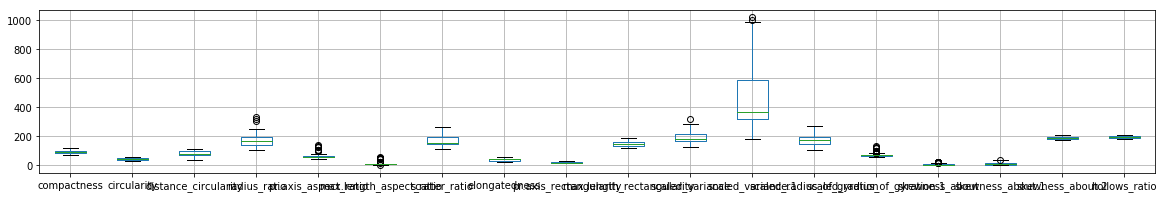

In [9]:
df.boxplot(figsize=(20,3)) # Check for outliers

In [10]:
# Convert 'class' datatype from object to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [11]:
# Define X and y variables
y = df['class']
X = df.drop('class', axis = 1)

In [12]:
# Standardize the data

from scipy.stats import zscore
X = X.apply(zscore)

Check for outliers in standardized data and remove the same by replacing it with maximum value in that attribute

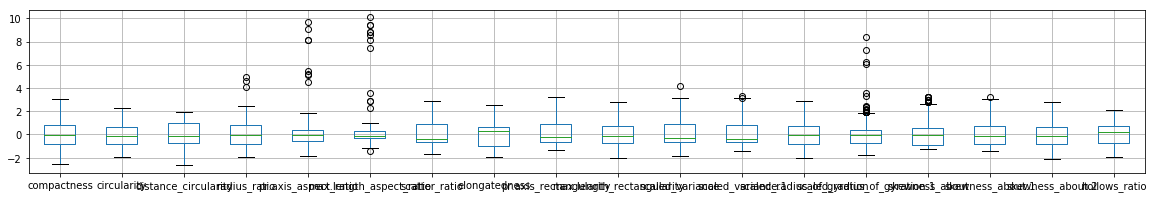

In [13]:
X.boxplot(figsize=(20,3))

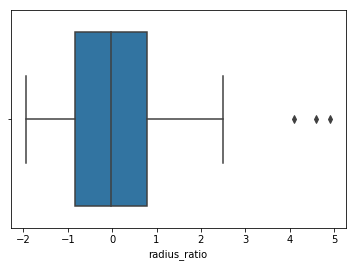

In [14]:
sns.boxplot(X['radius_ratio'])

In [15]:
X[X['radius_ratio']>2.5] = 2.50

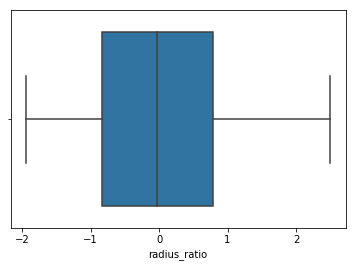

In [16]:
sns.boxplot(X['radius_ratio'])

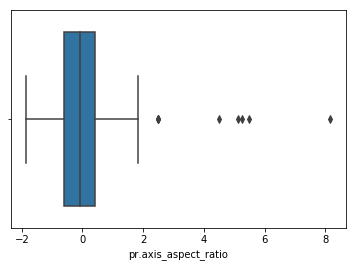

In [17]:
sns.boxplot(X['pr.axis_aspect_ratio'])

In [18]:
X[X['pr.axis_aspect_ratio']>1.9] = 1.9

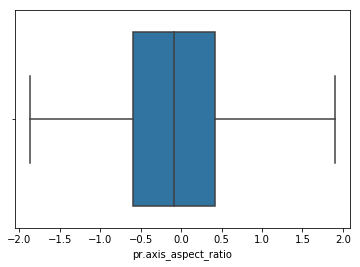

In [19]:
sns.boxplot(X['pr.axis_aspect_ratio'])

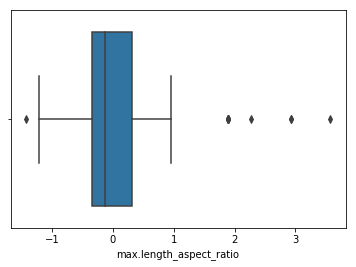

In [20]:
sns.boxplot(X['max.length_aspect_ratio'])

In [21]:
X[X['max.length_aspect_ratio']>0.9] = 0.9
X[X['max.length_aspect_ratio']<-1.25] = -1.25

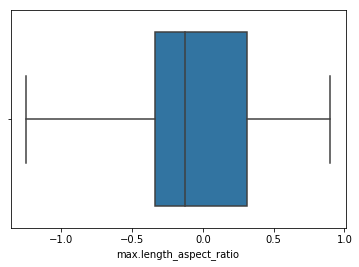

In [22]:
sns.boxplot(X['max.length_aspect_ratio'])

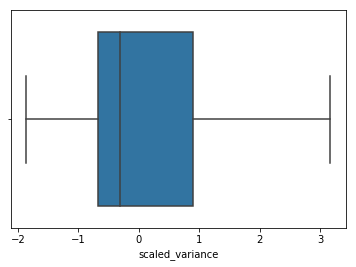

In [23]:
sns.boxplot(X['scaled_variance'])

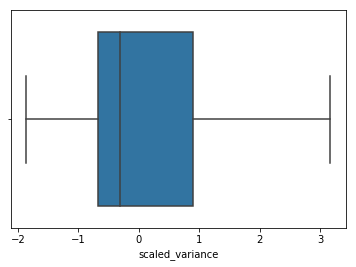

In [24]:
sns.boxplot(X['scaled_variance'])

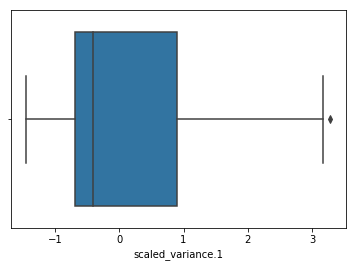

In [25]:
sns.boxplot(X['scaled_variance.1'])

In [26]:
X[X['scaled_variance.1']>3.2] = 3.2

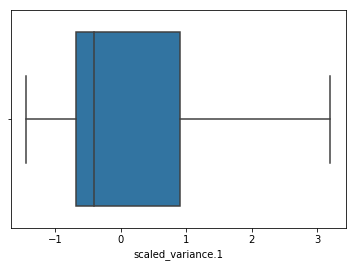

In [27]:
sns.boxplot(X['scaled_variance.1'])

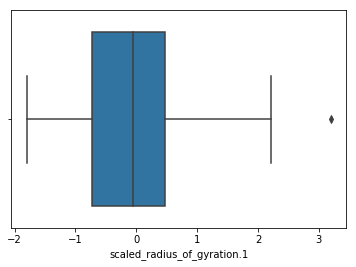

In [28]:
sns.boxplot(X['scaled_radius_of_gyration.1'])

In [29]:
X[X['scaled_radius_of_gyration.1']>2.2] = 2.2

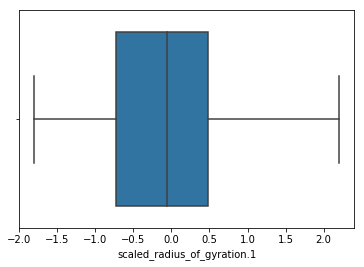

In [30]:
sns.boxplot(X['scaled_radius_of_gyration.1'])

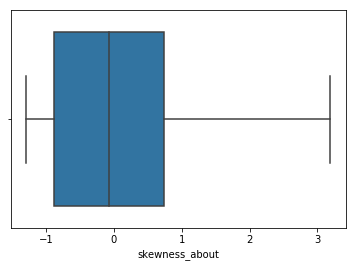

In [31]:
sns.boxplot(X['skewness_about'])

In [32]:
X[X['skewness_about']>2.8] = 2.8

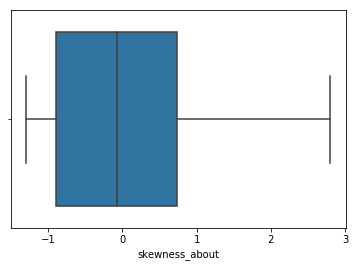

In [33]:
sns.boxplot(X['skewness_about'])

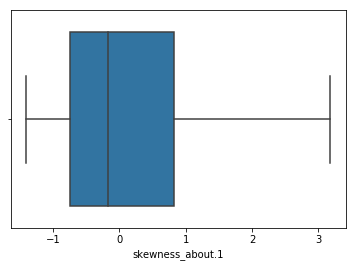

In [34]:
sns.boxplot(X['skewness_about.1'])

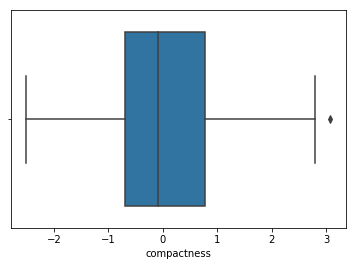

In [35]:
sns.boxplot(X['compactness'])

In [36]:
X[X['compactness']>2.9]=2.9

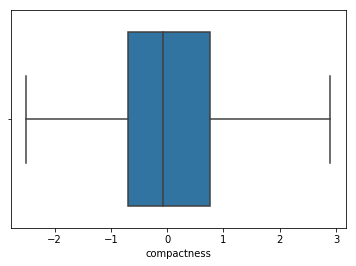

In [37]:
sns.boxplot(X['compactness'])

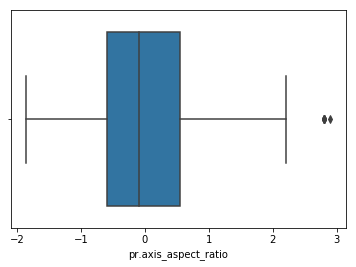

In [38]:
sns.boxplot(X['pr.axis_aspect_ratio'])

In [39]:
X[X['pr.axis_aspect_ratio']>1.9] = 1.9

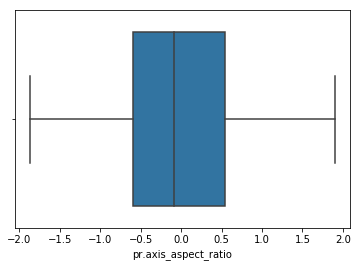

In [40]:
sns.boxplot(X['pr.axis_aspect_ratio'])

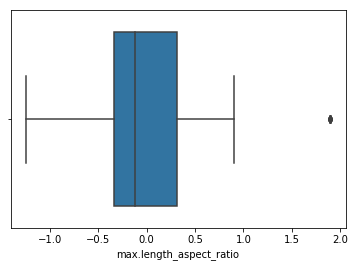

In [41]:
sns.boxplot(X['max.length_aspect_ratio'])

In [42]:
X[X['max.length_aspect_ratio']>0.9] = 0.9

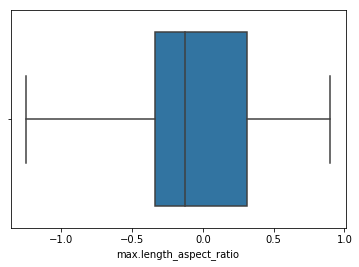

In [43]:
sns.boxplot(X['max.length_aspect_ratio'])

Checking for outliers after processing

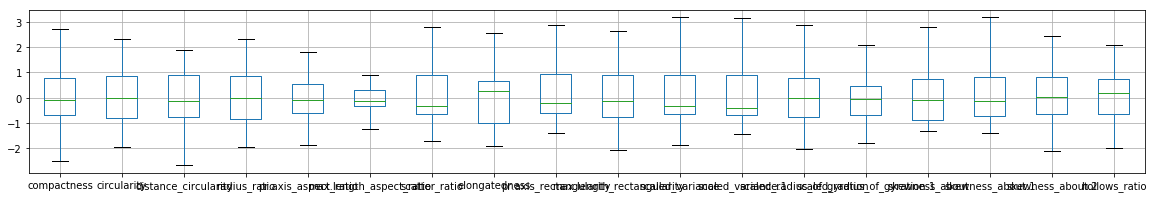

In [44]:
X.boxplot(figsize=(20,3))

Visualization of correlation between attributes using pair plot

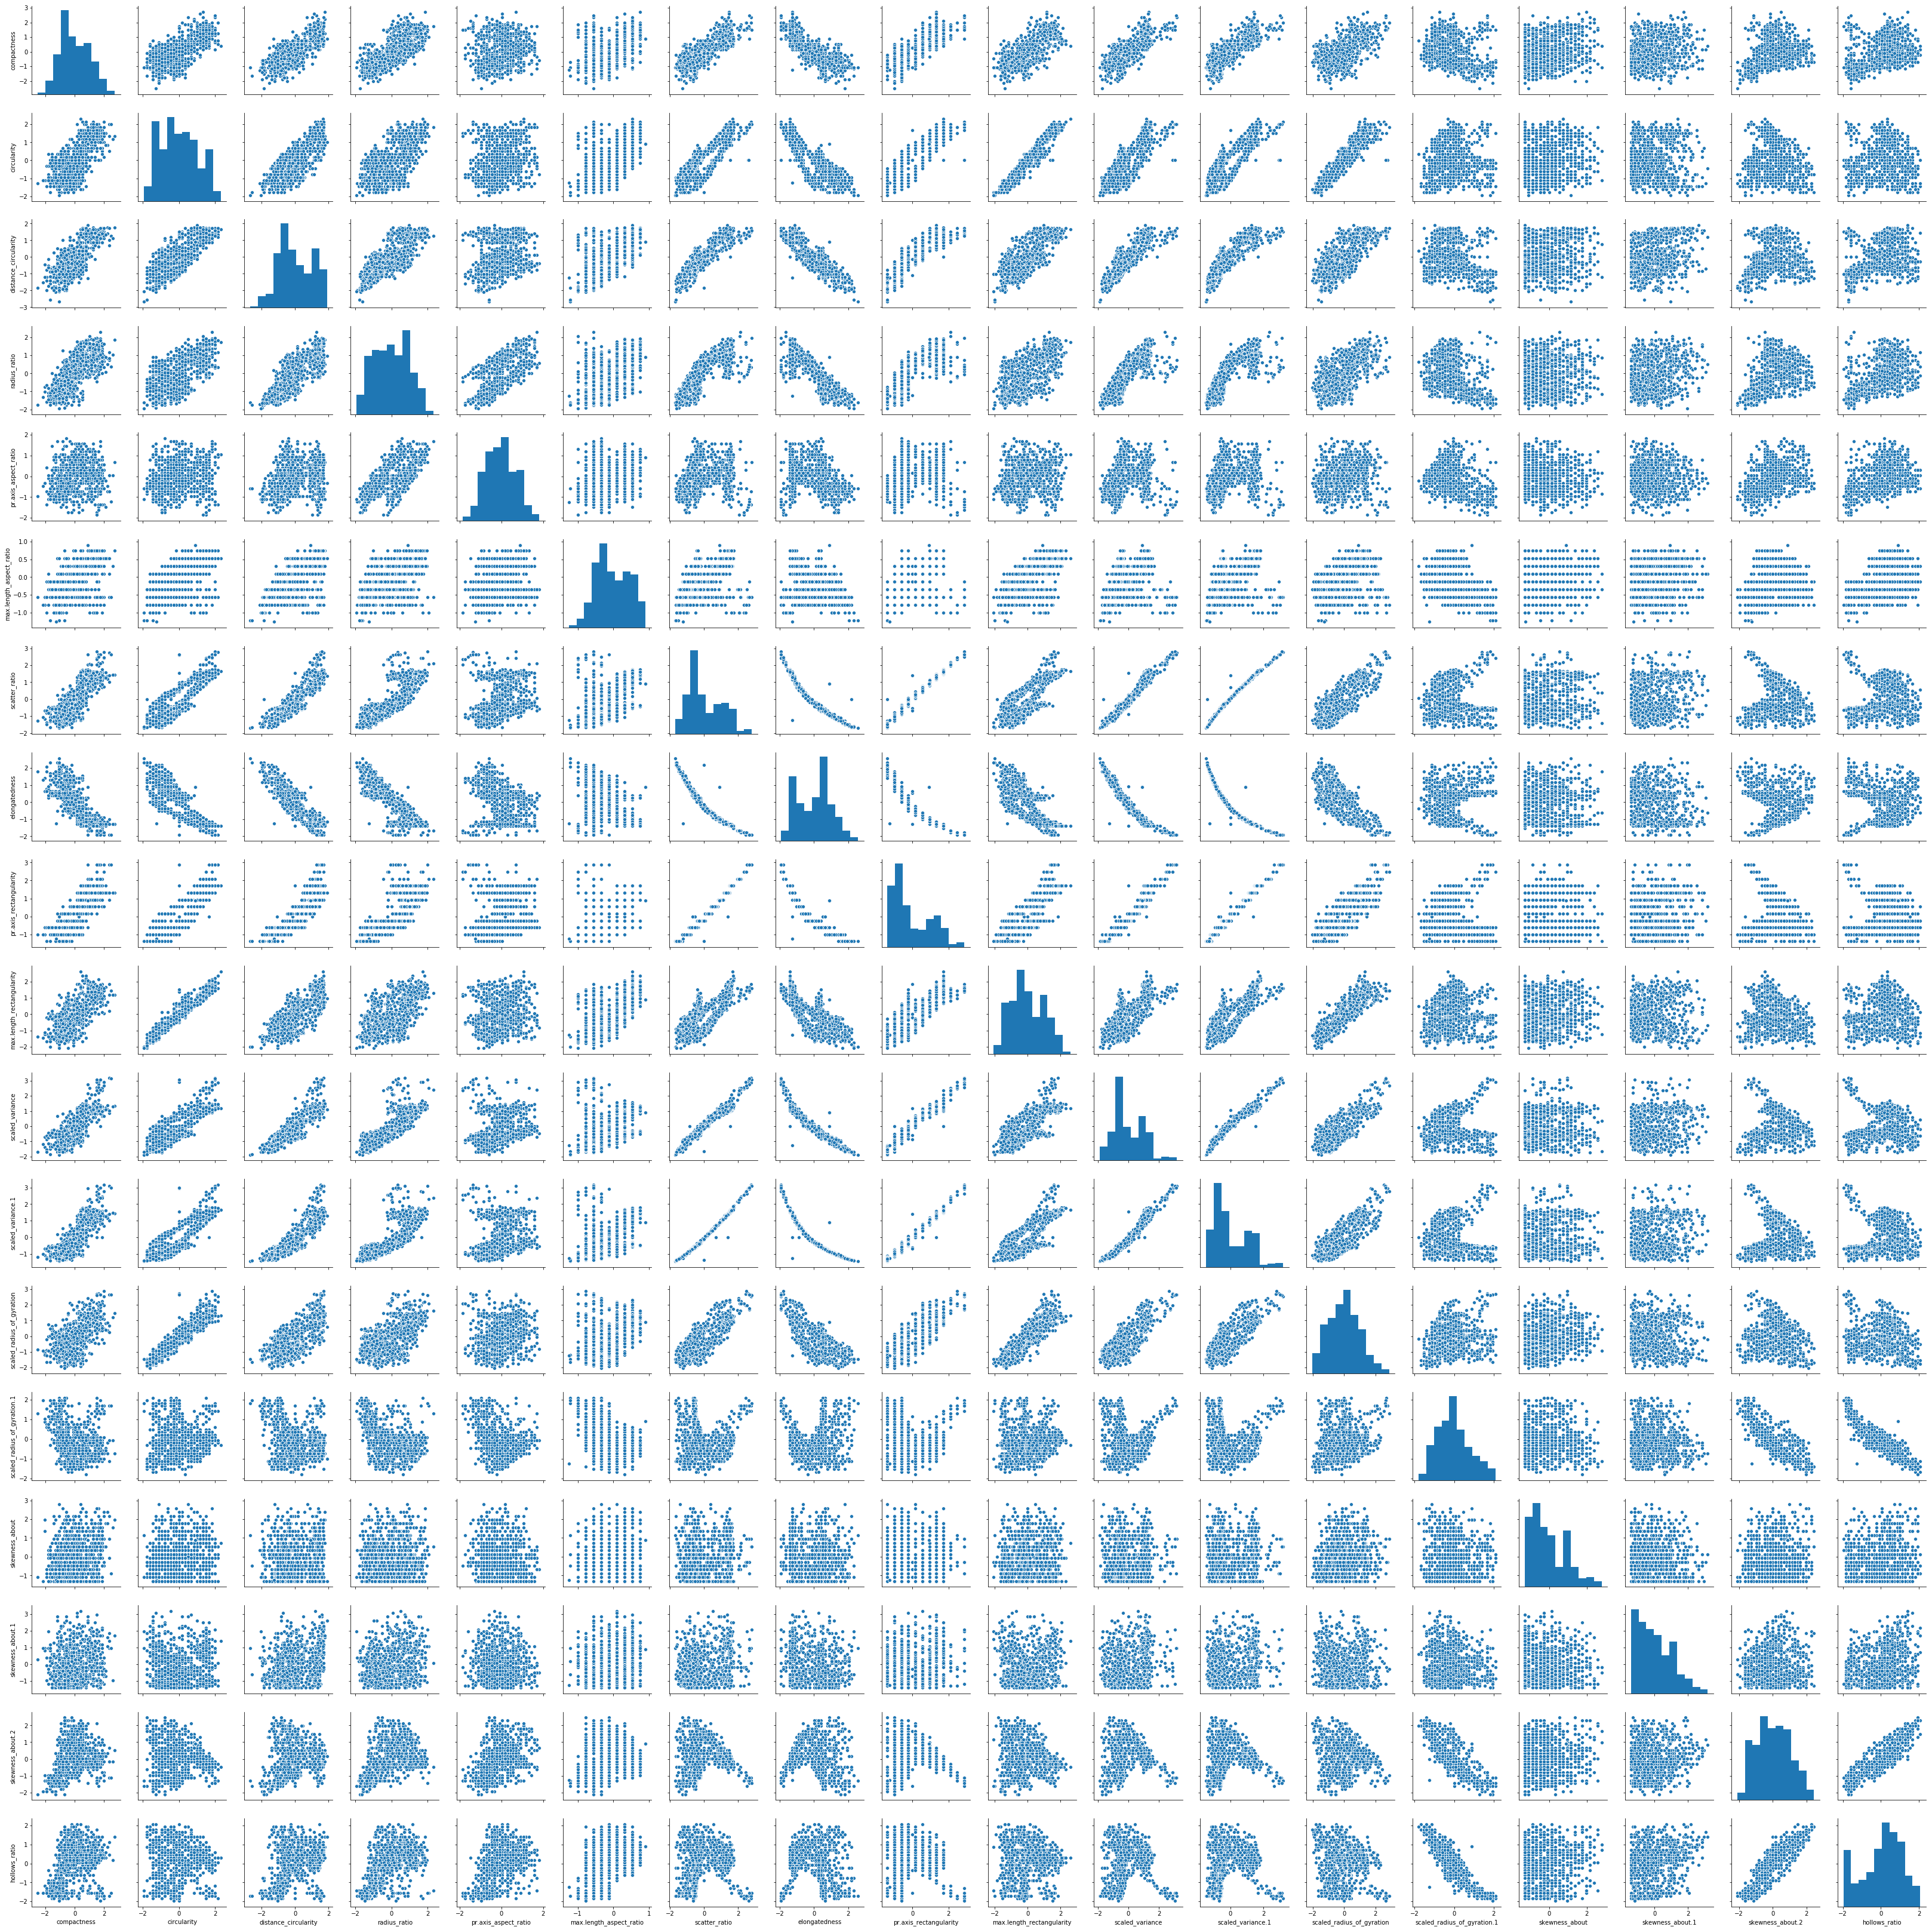

In [45]:
sns.pairplot(X)

In [46]:
# Find covariance matrix
cov_matrix = np.cov(X.T)
cov_matrix.shape

(18, 18)

In [47]:
#Find eigen vector and eigen values from the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)
eig_vals.shape


Eigen Vectors 
%s [[-2.77145095e-01 -1.14571833e-01 -4.50140936e-02  1.17042714e-01
   2.25339217e-01  2.37633100e-01  5.52151621e-01  3.59420695e-01
  -5.06983185e-01 -2.51393105e-01  1.28062590e-01  9.73098269e-02
  -1.28306516e-02 -6.08791478e-02  9.24867748e-03  7.08081162e-03
  -5.14808172e-02 -1.67393188e-02]
 [-2.94595674e-01  1.32695795e-01 -2.07946555e-01 -2.66015097e-02
  -3.50453079e-01 -1.76460220e-02  5.55545578e-02 -1.75889075e-01
  -1.66920273e-01  8.70748878e-02 -6.73775130e-02 -2.47695672e-01
   2.35069481e-02  7.46132437e-02 -9.91019193e-02 -5.67824504e-01
  -3.14382386e-01 -3.94923590e-01]
 [-3.05895610e-01 -6.37604732e-02  7.71370343e-02  4.51896077e-02
  -9.95057602e-02  1.05912598e-01 -2.90943033e-01  3.03070897e-01
   3.15297970e-01 -3.25633244e-01  4.48149977e-01 -4.13821377e-01
  -1.59168996e-03 -3.25310554e-01  2.62142272e-02 -2.73998656e-02
   9.44024470e-02 -5.50995547e-02]
 [-2.66008797e-01 -2.13206915e-01  1.07180349e-02 -1.56682745e-01
   1.31639996e-01 -

(18,)

In [48]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eig_vals[index], eig_vecs[:,index]) for index in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)


eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eig_vals))]

print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.152834833319979, array([-0.2771451 , -0.29459567, -0.30589561, -0.2660088 , -0.07728973,
       -0.08950428, -0.31968501,  0.29852924, -0.31671197, -0.28262144,
       -0.30846743, -0.31737196, -0.27508672,  0.01775845, -0.04492689,
       -0.06958861, -0.03859006, -0.07982179])), (2.9039599813205217, array([-0.11457183,  0.1326958 , -0.06376047, -0.21320692, -0.18676734,
       -0.05212189,  0.05583601, -0.00724994,  0.06792445,  0.12273236,
        0.051967  ,  0.0608061 ,  0.21506437,  0.44132601, -0.03249851,
       -0.12756061, -0.54554933, -0.54490863])), (1.1255175142793379, array([-0.04501409, -0.20794655,  0.07713703,  0.01071803, -0.1008909 ,
       -0.03744921,  0.10079141, -0.08549842,  0.10109174, -0.2061183 ,
        0.11899565,  0.09711394, -0.21601027,  0.06572813, -0.47481953,
        0.73907266, -0.12842259, -0.06454698])), (0.9148233544388863, array([ 0.11704271, -0.02660151,  0.04518961, -0.15668275, -0.24057306,
        0.06436261, -0.00363186,  0.14946288,  0.

In [49]:
tot = sum(eig_vals)
var_exp = np.array([( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)])
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)


Cumulative Variance Explained [ 57.19953599  75.34748321  82.381269    88.09834708  91.26385663
  94.4137378   96.07364671  97.34405812  98.16732078  98.7330166
  99.08171294  99.38853339  99.57156924  99.71636032  99.82310943
  99.92233446  99.97712669 100.        ]


From the cumulative variance, it can be seen that we can get 95% information from first 7 vectors

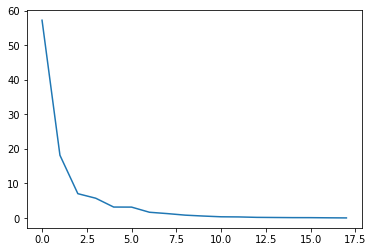

In [50]:
plt.plot(var_exp)

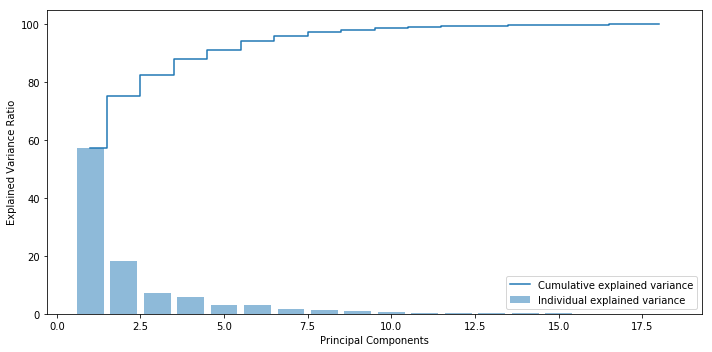

In [51]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [52]:
# Building PCA model with 7 components
from sklearn.decomposition import PCA

pca = PCA(n_components= 7, random_state = 3)
data_reduced = pca.fit_transform(X)
data_reduced.shape

(846, 7)

In [53]:
P_reduce = np.array(eigvectors_sorted[0:7])   # Reducing from 8 to 4 dimension space

X_std_4D = np.dot(data_reduced,P_reduce)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

In [54]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, y, test_size=test_size, random_state=seed)

In [55]:
pca.components_.shape

(7, 18)

In [56]:
pca.components_

array([[ 0.2771451 ,  0.29459567,  0.30589561,  0.2660088 ,  0.07728973,
         0.08950428,  0.31968501, -0.29852924,  0.31671197,  0.28262144,
         0.30846743,  0.31737196,  0.27508672, -0.01775845,  0.04492689,
         0.06958861,  0.03859006,  0.07982179],
       [-0.11457183,  0.1326958 , -0.06376047, -0.21320692, -0.18676734,
        -0.05212189,  0.05583601, -0.00724994,  0.06792445,  0.12273236,
         0.051967  ,  0.0608061 ,  0.21506437,  0.44132601, -0.03249851,
        -0.12756061, -0.54554933, -0.54490863],
       [-0.04501409, -0.20794655,  0.07713703,  0.01071803, -0.1008909 ,
        -0.03744921,  0.10079141, -0.08549842,  0.10109174, -0.2061183 ,
         0.11899565,  0.09711394, -0.21601027,  0.06572813, -0.47481953,
         0.73907266, -0.12842259, -0.06454698],
       [ 0.11704271, -0.02660151,  0.04518961, -0.15668275, -0.24057306,
         0.06436261, -0.00363186,  0.14946288,  0.01863083,  0.00789123,
        -0.03990506, -0.00170826, -0.00681896,  0.062

In [57]:
#df_comp = pd.DataFrame(pca.components_,columns=list(df_new))
df_comp = pd.DataFrame(data_reduced)


Build SVM model for tran and test dataset

In [58]:
from sklearn import svm

In [59]:
clf = svm.SVC()

In [60]:
clf.fit(X_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [61]:
y_predict = clf.predict(X_test)

In [62]:
type(y_predict)

numpy.ndarray

In [63]:
type(y_test)

pandas.core.series.Series

In [64]:
y_test = np.array(y_test)

In [65]:
type(y_test)

numpy.ndarray

In [66]:
clf.score(X_test, y_test)

0.8976377952755905

In [67]:
def Acc(testSet, predictSet):
    current = 0
    for i in range(len(testSet)):
        if testSet[i] == predictSet [i]:
            current +=1
    return (current/float(len(testSet)))* 100

In [68]:
Acc(y_test, y_predict)

89.76377952755905

Accuracy of the model is 89.76%

Gridsearch for setting hyper parameters

In [69]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],'gamma':[0.1,0.01,0.001,0.0001]}]

In [70]:
grid_search = GridSearchCV(estimator = clf, param_grid = parameters, scoring = 'accuracy', cv = 10)

In [71]:
grid_search = grid_search.fit(X_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [72]:
best_accuracy = grid_search.best_score_
best_accuracy

0.910472972972973

In [73]:
best_parameters = grid_search.best_params_
best_parameters

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [74]:
clf = svm.SVC(kernel='rbf', C=10, gamma=0.1).fit(X_train, y_train)

In [75]:
clf.score(X_train, y_train)

0.9543918918918919

In [76]:
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.9133858267716536

In [77]:
Acc(y_test, y_pred)

91.33858267716536

With hyper parameter, the accuracy can be increased to 91.34 %